# Heat Equation 1D



In this notebook we are solving the heat equation in 1D. The heat equation is given by

$$
\frac{\partial u}{\partial t} = \alpha \frac{\partial^2 u}{\partial x^2}
$$

where $u$ is the temperature, $t$ is time, $x$ is the position, and $\alpha$ is the thermal diffusivity. We will solve this equation using the finite difference method. The finite difference method approximates the derivatives by

## Finite Difference Method

We are using finite difference method to solve the equation. First we need to discretize the domain of our problem, we will use:

$$
x \in [0, 1]\quad t \in [0, 2]
$$


We will use the following discretization:

$$
x_i = i \Delta x \quad i = 0, 1, \dots, N_x\quad \Delta x = \frac{1}{N_x} \quad N_x = 10
$$

$$
t_n = n \Delta t \quad n = 0, 1, \dots, N_t\quad \Delta t = \frac{2}{N_t} \quad N_t = 100
$$

Now the derivatives can be approximated by

$$
\frac{\partial u}{\partial t} \approx \frac{u(x, t + \Delta t) - u(x, t)}{\Delta t} = \frac{u^{n+1}_i - u^n_i}{\Delta t}
$$

$$
\frac{\partial^2 u}{\partial x^2} \approx \frac{u(x + \Delta x, t) - 2 u(x, t) + u(x - \Delta x, t)}{\Delta x^2} = \frac{u^{n}_{i+1} - 2 u^n_i + u^n_{i-1}}{\Delta x^2}
$$

now we can substitute these approximations in the heat equation

$$
\frac{u^{n+1}_i - u^n_i}{\Delta t} = \alpha \frac{u^{n}_{i+1} - 2 u^n_i + u^n_{i-1}}{\Delta x^2}
$$

and solve for $u^{n+1}_i$

$$
u^{n+1}_i = u^n_i + \frac{\alpha \Delta t}{\Delta x^2} (u^{n}_{i+1} - 2 u^n_i + u^n_{i-1})
$$

## Initial and Boundary Conditions

We need to specify the initial and boundary conditions to solve the problem. The initial condition is

$$
u(x, 0) = 10 \quad 0 \leq x \leq 1
$$

and the boundary conditions are

$$
u(0, t) = 10 \quad u(1, t) = 0
$$

and the thermal diffusivity is $\alpha = 1\times 10^{-3}\text{ m}^2/\text{s}$.


## Implementation

In [1]:
# Libraries
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

In [54]:
# Parameters
L = 1.0 # Length of the rod
N = 100 # Number of points
dx = L/N # Distance between points
tf = 1.0 # Final time
alpha = 2.0 # Diffusion coefficient
dt = (dx**2)/(4*alpha) # Time step (stability condition)

In [55]:
# Create the grid
u = np.empty((int(tf/dt)+1, N+1)) # Create the grid

# Initial condition
u0 = 0.0 # Initial temperature

# Boundary conditions
u_left = 10.0 # Left boundary condition
u_right = 0.0 # Right boundary condition

# Set the initial condition
u.fill(u0) # Set the initial condition

# Set the boundary conditions
u[:,0] = u_left # Set the left boundary condition 
u[:,-1] = u_right # Set the right boundary condition

In [56]:
# Finite difference scheme
for ti in range(0, int(tf/dt)):
    for Ni in range(1, N):
        u[ti+1, Ni] = u[ti, Ni] + alpha*dt/dx**2*(u[ti, Ni+1] - 2*u[ti, Ni] + u[ti, Ni-1])

In [57]:
# Structure data for plotting
data = u.T
data = data.reshape([data.shape[0], 1, data.shape[1]])
data = np.repeat(data, 20, axis=1)
u.shape, data.shape

((80001, 101), (101, 20, 80001))

In [58]:
data[0,:,:].T.shape

(80001, 20)

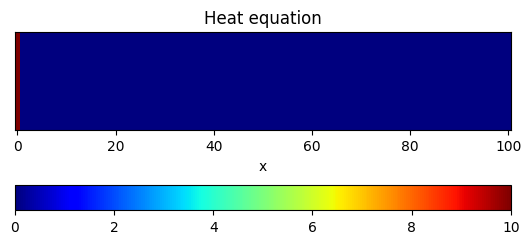

In [102]:
# Plot initial condition using imshow
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlabel('x')
ax.set_yticks([])
ax.set_title('Heat equation')
plot = ax.imshow(data[:,:,0].T, cmap='jet', vmin=0.0, vmax=10.0)
# Horizontal colorbar
plt.colorbar(plot, ax=ax, orientation='horizontal')
plt.show()

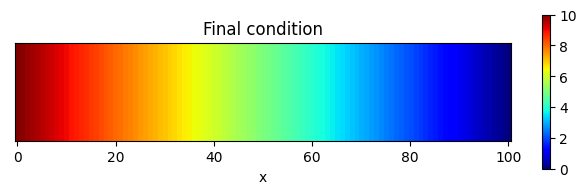

In [105]:
# Plot final condition as a bar using imshow
fig = plt.figure(figsize=(8,2))
ax = fig.add_subplot(111)
ax.set_title('Final condition')
ax.set_xlabel('x')
ax.set_yticks([])
plot = ax.imshow(data[:,:,-1].T, cmap='jet', vmin=0.0, vmax=10.0)
plt.colorbar(plot, ax=ax)
plt.show()

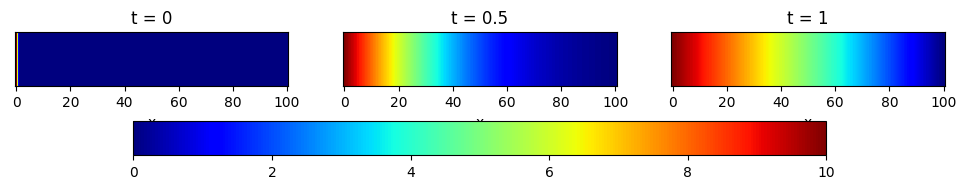

In [114]:
# Plot t_initial, t_final and t_final/2
fig, ax = plt.subplots(1, 3, figsize=(12, 3))
ax[0].set_title('t = 0')
ax[0].set_xlabel('x')
ax[0].set_yticks([])
ax[0].imshow(data[:,:,0].T, cmap='jet', vmin=0.0, vmax=10.0)
ax[1].set_title('t = ' + str(tf/2))
ax[1].set_xlabel('x')
ax[1].set_yticks([])
ax[1].imshow(data[:,:,3000].T, cmap='jet', vmin=0.0, vmax=10.0)
ax[2].set_title('t = 1')
ax[2].set_xlabel('x')
ax[2].set_yticks([])
ax[2].imshow(data[:,:,-1].T, cmap='jet', vmin=0.0, vmax=10.0)

# Add a colorbar horizontally
plt.colorbar(plot, ax=ax, orientation='horizontal')
plt.savefig('heat_equation_1d.png', dpi=300, bbox_inches='tight', transparent=True)
plt.show()


MovieWriter ffmpeg unavailable; using Pillow instead.


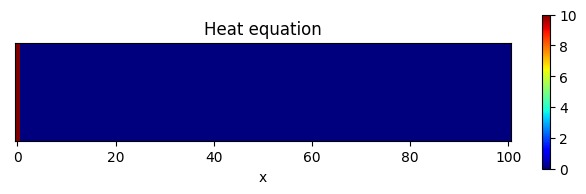

In [72]:
# Create animation 
fig = plt.figure(figsize=(8,2))

# Create the axes
ax = fig.add_subplot(111)
ax.set_xlabel('x')
ax.set_yticks([])
ax.set_title('Heat equation')

# Plot the initial condition
plot = ax.imshow(data[:,:,0].T, cmap='jet', vmin=0.0, vmax=10.0)
plt.colorbar(plot, ax=ax)

# Update function
def update(i):
    plot.set_data(data[:,:,i*10].T)
    return plot

# Animate
ani = animation.FuncAnimation(fig, update, frames=1000, interval=1)
ani.save('heat_equation_1d.gif', fps=30)

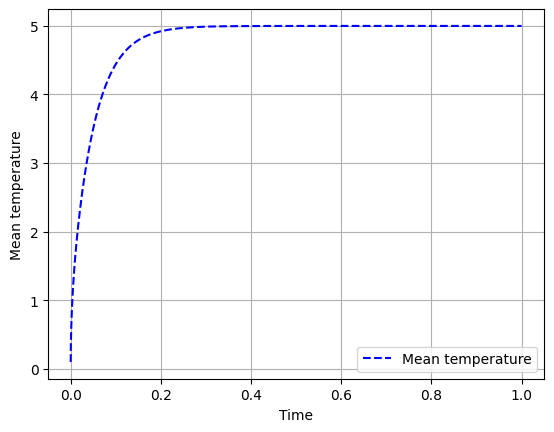

In [94]:
# Plot of mean temperature vs time
plt.figure()
t_mean = np.linspace(0, tf, int(tf/dt)+1)
plt.plot(t_mean, np.mean(data[:,0,:], axis=0), 'b--', label='Mean temperature')
plt.xlabel('Time')
plt.ylabel('Mean temperature')
plt.legend()
plt.grid()
plt.show()

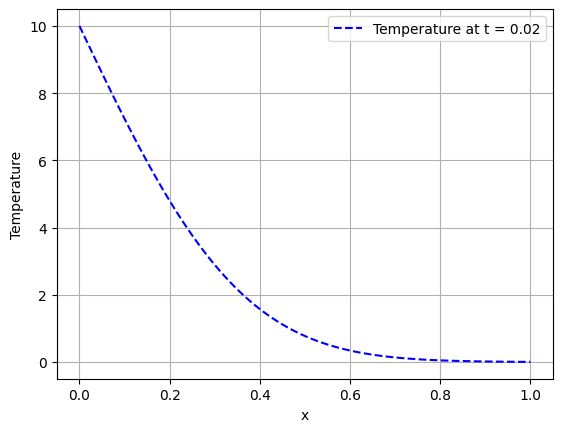

In [100]:
# Plot temperature at time t final vs x
plt.figure()
x = np.linspace(0, L, N+1)
plt.plot(x, data[:,0,int(0.02/dt)], 'b--', label='Temperature at t = 0.02')
plt.xlabel('x')
plt.ylabel('Temperature')
plt.legend()
plt.grid()
plt.show()